# Qiskit Machine Learning - New QuantumKernel

# Support Vector Machine
<div style="float: left; width: 50%;">
<br>
Linear decision function

$$
\widetilde{c}_{\text{SVM}}(\mathbf{x}) = \mathrm{sign}(\mathbf{w}^T\mathbf{x} - b)
$$

This only works for linearly separable data

Objective is to maximize the margin

$$
\min_{\mathbf{w} \in \mathbb{R}^s, \, b \in \mathbb{R}} ||\mathbf{w}||^2 \\
\text{s. t. } y_i(\mathbf{w}^T \mathbf{x}_i - b) \geq 1
$$

</div>
<div style="float: right; width: 50%; padding-right=20px;">
    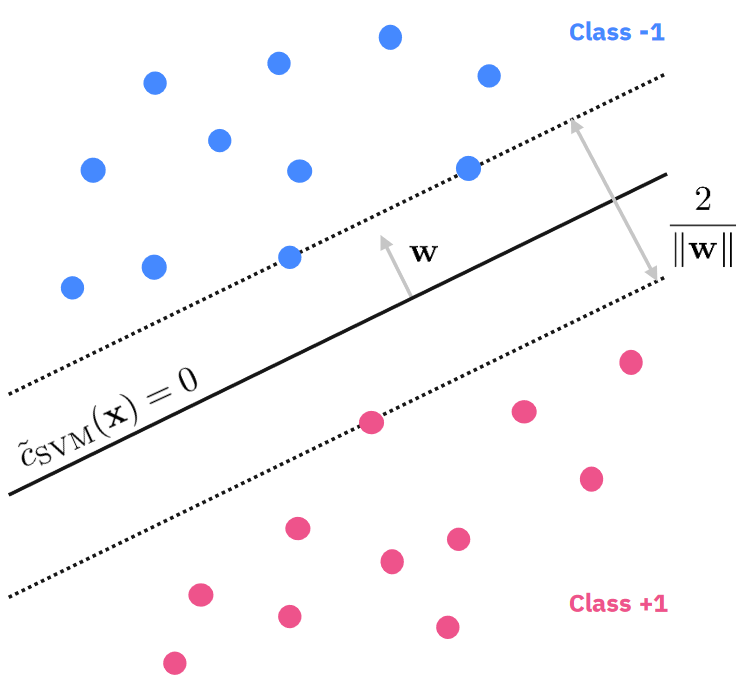
    <br>
</div>

# Quantum SVM
<div style="float: left; width: 50%;">
<br>
Optimization is like in regular SVM, on a classical computer

Feature map is defined as a quantum circuit $\mathcal{E}(\mathbf{x})$:

$$
\begin{align}
\psi : \mathbb{R}^s & \rightarrow \mathcal{S}(2^q) \\
\mathbf{x} & \mapsto |\psi(\mathbf{x})\rangle \langle\psi(\mathbf{x})| \\
\end{align}
$$

Quantum Kernel as a Hilbert-Schmidt inner product:

$$
\begin{align}
k(\mathbf{x}, \mathbf{x'}) & = \mathrm{tr}[|\psi(\mathbf{x'})\rangle \langle\psi(\mathbf{x'})| \, |\psi(\mathbf{x})\rangle \langle\psi(\mathbf{x})|] \\
& = |\langle\psi(\mathbf{x'})|\psi(\mathbf{x})\rangle|^2 \\
& = |\langle0|\mathcal{E}(\mathbf{x'})^\dagger\mathcal{E}(\mathbf{x})|0\rangle|^2
\end{align}
$$

</div>
<div style="float: right; width: 50%; padding-right=20px;">
    <center>
    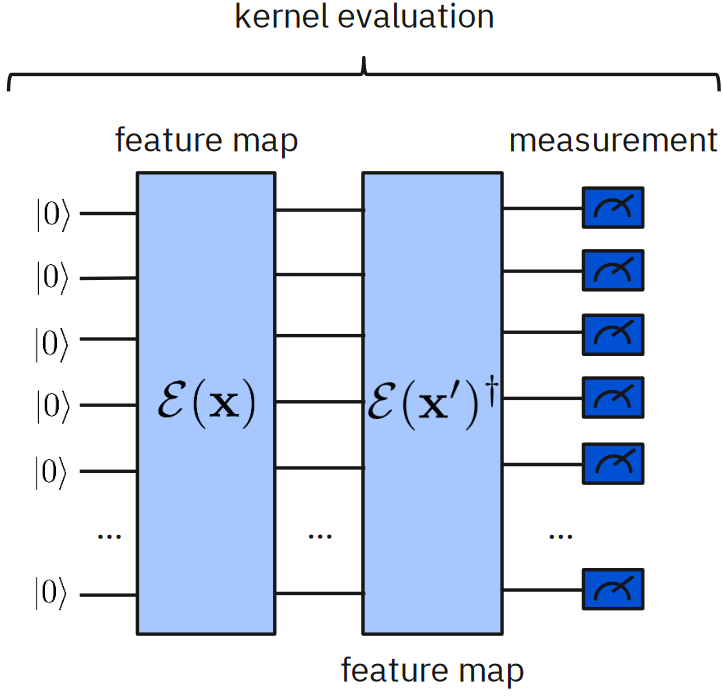
    </center>
</div>

# Current Implementation

Qiskit Machine Learning provides a single class called `QuantumKernel` that does everything:
- Constructs circuits
- Executes circuits and evaluates overlap between circuits
- Provides training parameters
- Keeps track of the values assigned to the parameters.

Also QML provides a Quantum Support Vector Machine implementation as a thin wrapper of the `scikit-learn` algorithms `SVC` and `SVR` that makes use of `QuantumKernel`.

## How it looks now
<center>
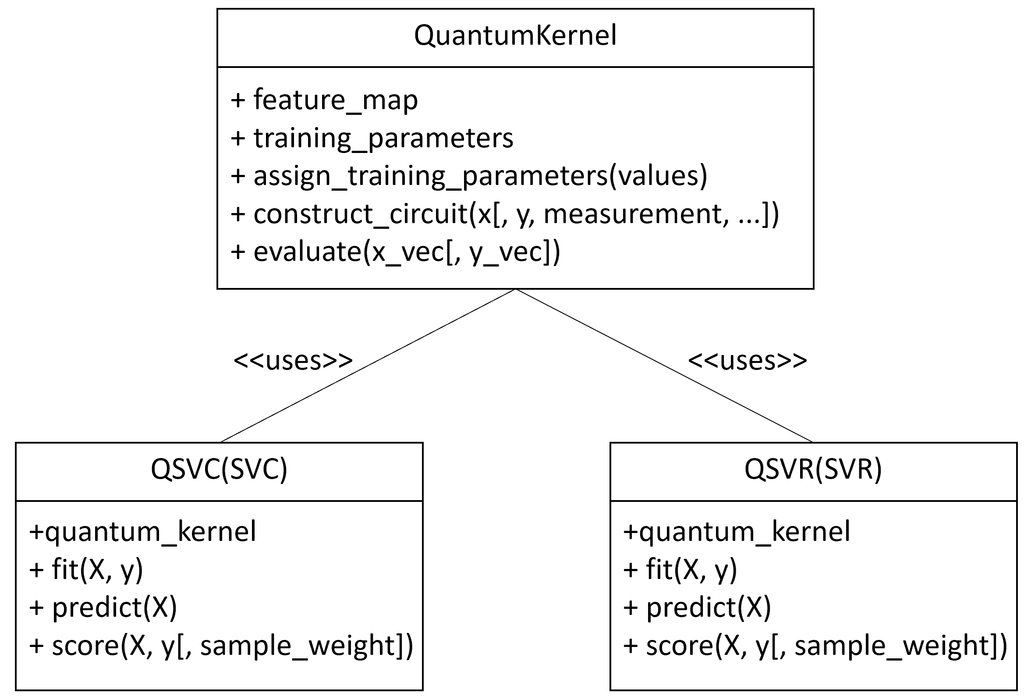
</center>

# New Implementation

The goals of the new implementation were:
- Migrate to the primitives by introducing a new Fidelity primitive/algorithm to evaluate "closeness" of the states.
- Extract trainability feature to a dedicated class.
- Introduce a base class that can be extended by other kernel implementations.

## What will be released
<center>
    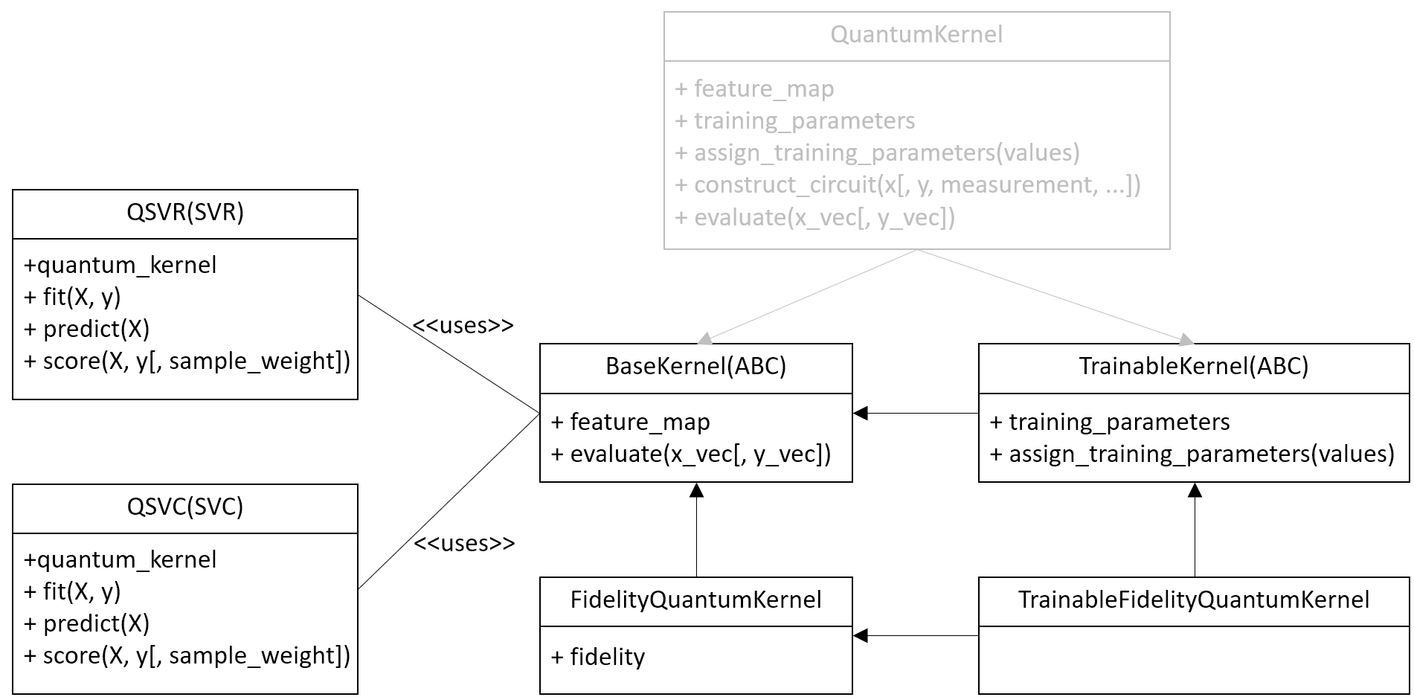
</center>

# Demo

In [1]:
import matplotlib.pyplot as plt
from qiskit import Aer
from qiskit.algorithms.state_fidelities import ComputeUncompute
from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import Sampler
from qiskit.utils import algorithm_globals, QuantumInstance
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.kernels import QuantumKernel, FidelityQuantumKernel

## Dataset

In [2]:
algorithm_globals.random_seed = 123456
features, labels = make_classification(
    n_samples=20, 
    n_features=2, 
    n_redundant=0, 
    random_state=algorithm_globals.random_seed
)

features = MinMaxScaler().fit_transform(features)

Plot the dataset

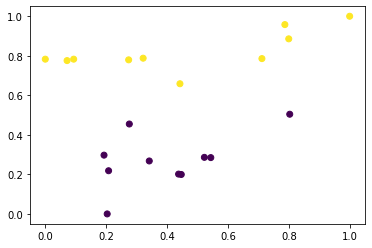

In [3]:
plt.scatter(features[:, 0], features[:, 1], c=labels)

Split the dataset

In [4]:
train_features, test_feature, train_labels, test_labels = train_test_split(
    features, labels, 
    train_size=15, 
    random_state=algorithm_globals.random_seed
)

## Old QuantumKernel

Create an old quantum kernel and a model

In [5]:
qi_sv = QuantumInstance(
    Aer.get_backend("statevector_simulator"),
    seed_simulator=algorithm_globals.random_seed,
    seed_transpiler=algorithm_globals.random_seed,
)

qk_old = QuantumKernel(feature_map=ZZFeatureMap(2), quantum_instance=qi_sv)
qsvc = QSVC(quantum_kernel=qk_old)

Train and score the model

In [6]:
qsvc.fit(train_features, train_labels)

qsvc.score(test_feature, test_labels)

1.0

## New QuantumKernel

Create a new quantum kernel and a model. Fidelity is optional, if it is not set a default instace based on the reference implementation will be created. We explicitly create it here to show how it can be supplied.

In [7]:
# these are optional
sampler = Sampler()
fidelity = ComputeUncompute(sampler)

qk_new = FidelityQuantumKernel(feature_map=ZZFeatureMap(2), fidelity=fidelity)

qsvc = QSVC(quantum_kernel=qk_new)

Train and score the model

In [8]:
qsvc.fit(train_features, train_labels)

qsvc.score(test_feature, test_labels)

1.0

In [9]:
import qiskit.tools.jupyter

%qiskit_copyright